<h3> N.L.P. Model to Estimate Ratings of a Movie Based on Reviews </h3>

In [47]:
import nltk
import re
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords


def sentence_tokenize(text):
    sentences = nltk.sent_tokenize(text)
    return sentences
    

def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    new_text = re.sub(pattern, '', text)
    return new_text

def remove_numbers(text):
    text = re.sub('\w*\d\w*', "",text)
    #print(new_text)
    return text

def word_tokenize(text):
    #remove punctuations
    tokeniser = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokens = (tokeniser.tokenize(text))
    return tokens
    
def lemmatization(text):
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token, pos='v') for token in text]
    return lemmas
    
def remove_stopwords(text):
    stopwords = nltk.corpus.stopwords.words('english')
    new_text = [word for word in text if word not in stopwords]
    return new_text

def list_to_string(str2):  
    str1 = " "   
    return (str1.join(str2)) 
    

<h3> PREPROCESSING </h3>

In [48]:
df = pd.read_csv('D:/UTA/Fall-2020/ML/Project/final_train_dataset.csv')
df_test = pd.read_csv('D:/UTA/Fall-2020/ML/Project/final_test_dataset.csv')
lower_case_dataset = pd.DataFrame(df.Reviews.apply(lambda x: x.lower()))
reviews_without_htmltags_df =  pd.DataFrame(lower_case_dataset.Reviews.apply(lambda x: remove_html_tags(x)))
reviews_without_htmltags_df =  pd.DataFrame(reviews_without_htmltags_df.Reviews.apply(lambda x: remove_numbers(x)))
lower_case_test_dataset = pd.DataFrame(df_test.Reviews.apply(lambda x: x.lower()))
reviews_without_htmltags_df_test =  pd.DataFrame(lower_case_test_dataset.Reviews.apply(lambda x: remove_html_tags(x)))
reviews_without_htmltags_df_test =  pd.DataFrame(reviews_without_htmltags_df_test.Reviews.apply(lambda x: remove_numbers(x)))
reviews_without_htmltags_df_test

,Reviews
0,"first of all i hate those moronic rappers, who..."
1,a big disappointment for what was touted as an...
2,this film is absolutely appalling and awful. i...
3,new york family is the last in their neighborh...
4,"the best thing about ""the prey"" is the tag lin..."
...,...
24995,i'm not a sports fan - but i love sports flics...
24996,"this movie gives golf a high mark, it was well..."
24997,"wow, here is another great golf movie. that's ..."
24998,"although i'm not a golf fan, i attended a snea..."


In [49]:
#For train dataset
reviews_without_htmltags_df['Reviews_sentence_tokenized'] = reviews_without_htmltags_df['Reviews']
reviews_without_htmltags_df['Reviews_sentence_tokenized'] = reviews_without_htmltags_df['Reviews'].apply(lambda x: sentence_tokenize(x))

#word tokenizing
reviews_without_htmltags_df['Reviews_word_tokenized'] = reviews_without_htmltags_df['Reviews']
reviews_without_htmltags_df['Reviews_word_tokenized'] = reviews_without_htmltags_df['Reviews'].apply(lambda x: word_tokenize(x))

#removing stop words
reviews_without_htmltags_df['Reviews_without_stopwords'] = reviews_without_htmltags_df['Reviews_word_tokenized'].apply(lambda x: remove_stopwords(x))
reviews_without_htmltags_df

#For test dataset
reviews_without_htmltags_df_test['Reviews_sentence_tokenized'] = reviews_without_htmltags_df_test['Reviews']
reviews_without_htmltags_df_test['Reviews_sentence_tokenized'] = reviews_without_htmltags_df_test['Reviews'].apply(lambda x: sentence_tokenize(x))

#word tokenizing
reviews_without_htmltags_df_test['Reviews_word_tokenized'] = reviews_without_htmltags_df_test['Reviews']
reviews_without_htmltags_df_test['Reviews_word_tokenized'] = reviews_without_htmltags_df_test['Reviews'].apply(lambda x: word_tokenize(x))

#removing stop words
reviews_without_htmltags_df_test['Reviews_without_stopwords'] = reviews_without_htmltags_df_test['Reviews_word_tokenized'].apply(lambda x: remove_stopwords(x))
reviews_without_htmltags_df_test


,Reviews,Reviews_sentence_tokenized,Reviews_word_tokenized,Reviews_without_stopwords
0,"first of all i hate those moronic rappers, who...","[first of all i hate those moronic rappers, wh...","[first, of, all, i, hate, those, moronic, rapp...","[first, hate, moronic, rappers, could, nt, act..."
1,a big disappointment for what was touted as an...,[a big disappointment for what was touted as a...,"[a, big, disappointment, for, what, was, toute...","[big, disappointment, touted, incredible, film..."
2,this film is absolutely appalling and awful. i...,"[this film is absolutely appalling and awful.,...","[this, film, is, absolutely, appalling, and, a...","[film, absolutely, appalling, awful, low, budg..."
3,new york family is the last in their neighborh...,[new york family is the last in their neighbor...,"[new, york, family, is, the, last, in, their, ...","[new, york, family, last, neighborhood, get, t..."
4,"the best thing about ""the prey"" is the tag lin...","[the best thing about ""the prey"" is the tag li...","[the, best, thing, about, the, prey, is, the, ...","[best, thing, prey, tag, line, human, got, axe..."
...,...,...,...,...
24995,i'm not a sports fan - but i love sports flics...,[i'm not a sports fan - but i love sports flic...,"[i, m, not, a, sports, fan, but, i, love, spor...","[sports, fan, love, sports, flics, great, spor..."
24996,"this movie gives golf a high mark, it was well...","[this movie gives golf a high mark, it was wel...","[this, movie, gives, golf, a, high, mark, it, ...","[movie, gives, golf, high, mark, well, acted, ..."
24997,"wow, here is another great golf movie. that's ...","[wow, here is another great golf movie., that'...","[wow, here, is, another, great, golf, movie, t...","[wow, another, great, golf, movie, least, thre..."
24998,"although i'm not a golf fan, i attended a snea...","[although i'm not a golf fan, i attended a sne...","[although, i, m, not, a, golf, fan, i, attende...","[although, golf, fan, attended, sneak, preview..."


In [50]:
#For train dataset
reviews_without_htmltags_df['Reviews_lammatized'] = reviews_without_htmltags_df['Reviews_without_stopwords'].apply(lambda x: lemmatization(x))
reviews_without_htmltags_df['Reviews_sentences'] = reviews_without_htmltags_df['Reviews_lammatized'].apply(lambda x: list_to_string(x))
reviews_without_htmltags_df['Class'] = pd.DataFrame(df.Class)

# For test dataset
reviews_without_htmltags_df_test['Reviews_lammatized'] = reviews_without_htmltags_df_test['Reviews_without_stopwords'].apply(lambda x: lemmatization(x))
reviews_without_htmltags_df_test['Reviews_sentences'] = reviews_without_htmltags_df_test['Reviews_lammatized'].apply(lambda x: list_to_string(x))
reviews_without_htmltags_df_test['Class'] = pd.DataFrame(df_test.Class)
reviews_without_htmltags_df_test

,Reviews,Reviews_sentence_tokenized,Reviews_word_tokenized,Reviews_without_stopwords,Reviews_lammatized,Reviews_sentences,Class
0,"first of all i hate those moronic rappers, who...","[first of all i hate those moronic rappers, wh...","[first, of, all, i, hate, those, moronic, rapp...","[first, hate, moronic, rappers, could, nt, act...","[first, hate, moronic, rappers, could, nt, act...",first hate moronic rappers could nt act gun pr...,1
1,a big disappointment for what was touted as an...,[a big disappointment for what was touted as a...,"[a, big, disappointment, for, what, was, toute...","[big, disappointment, touted, incredible, film...","[big, disappointment, tout, incredible, film, ...",big disappointment tout incredible film incred...,1
2,this film is absolutely appalling and awful. i...,"[this film is absolutely appalling and awful.,...","[this, film, is, absolutely, appalling, and, a...","[film, absolutely, appalling, awful, low, budg...","[film, absolutely, appal, awful, low, budget, ...",film absolutely appal awful low budget budget ...,1
3,new york family is the last in their neighborh...,[new york family is the last in their neighbor...,"[new, york, family, is, the, last, in, their, ...","[new, york, family, last, neighborhood, get, t...","[new, york, family, last, neighborhood, get, t...",new york family last neighborhood get televisi...,1
4,"the best thing about ""the prey"" is the tag lin...","[the best thing about ""the prey"" is the tag li...","[the, best, thing, about, the, prey, is, the, ...","[best, thing, prey, tag, line, human, got, axe...","[best, thing, prey, tag, line, human, get, axe...",best thing prey tag line human get axe movie p...,1
...,...,...,...,...,...,...,...
24995,i'm not a sports fan - but i love sports flics...,[i'm not a sports fan - but i love sports flic...,"[i, m, not, a, sports, fan, but, i, love, spor...","[sports, fan, love, sports, flics, great, spor...","[sport, fan, love, sport, flics, great, sport,...",sport fan love sport flics great sport flic on...,10
24996,"this movie gives golf a high mark, it was well...","[this movie gives golf a high mark, it was wel...","[this, movie, gives, golf, a, high, mark, it, ...","[movie, gives, golf, high, mark, well, acted, ...","[movie, give, golf, high, mark, well, act, wel...",movie give golf high mark well act well direct...,10
24997,"wow, here is another great golf movie. that's ...","[wow, here is another great golf movie., that'...","[wow, here, is, another, great, golf, movie, t...","[wow, another, great, golf, movie, least, thre...","[wow, another, great, golf, movie, least, thre...",wow another great golf movie least three past ...,10
24998,"although i'm not a golf fan, i attended a snea...","[although i'm not a golf fan, i attended a sne...","[although, i, m, not, a, golf, fan, i, attende...","[although, golf, fan, attended, sneak, preview...","[although, golf, fan, attend, sneak, preview, ...",although golf fan attend sneak preview movie a...,10


In [86]:
def preprocessing(text):
    review = text.lower()
    review = remove_html_tags(review)
    review = remove_numbers(review)
    review = sentence_tokenize(review)
    review = list_to_string(review)
    review = word_tokenize(review)
    review = remove_stopwords(review)
    review = lemmatization(review)
    final_review = list_to_string(review)
    return final_review

In [51]:
train_df = pd.DataFrame(reviews_without_htmltags_df['Reviews_sentences'])
train_df['Class']= reviews_without_htmltags_df['Class']

test_df = pd.DataFrame(reviews_without_htmltags_df_test['Reviews_sentences'])
test_df['Class']= reviews_without_htmltags_df_test['Class']
test_df

,Reviews_sentences,Class
0,first hate moronic rappers could nt act gun pr...,1
1,big disappointment tout incredible film incred...,1
2,film absolutely appal awful low budget budget ...,1
3,new york family last neighborhood get televisi...,1
4,best thing prey tag line human get axe movie p...,1
...,...,...
24995,sport fan love sport flics great sport flic on...,10
24996,movie give golf high mark well act well direct...,10
24997,wow another great golf movie least three past ...,10
24998,although golf fan attend sneak preview movie a...,10


<h3> CREATING DOCUMENT MATRIX </h3>

In [61]:
# Import module
from sklearn.feature_extraction.text import CountVectorizer
# Create an instance of CountfVectorizer
vectoriser = CountVectorizer()
# Fit to the data and transform to feature matrix
X_train = vectoriser.fit_transform(train_df['Reviews_sentences'])
X_test = vectoriser.transform(test_df['Reviews_sentences'])

In [62]:
print(X_train)
#print(X_test)

  (0, 52544)	1
  (0, 18564)	1
  (0, 31030)	1
  (0, 54776)	1
  (0, 3074)	1
  (0, 20035)	2
  (0, 62914)	1
  (0, 24493)	1
  (0, 24010)	1
  (0, 49632)	1
  (0, 42132)	3
  (0, 12176)	1
  (0, 6176)	1
  (0, 6892)	1
  (0, 61606)	3
  (0, 1661)	1
  (0, 49281)	2
  (0, 14475)	1
  (0, 42666)	1
  (0, 15106)	1
  (0, 18681)	2
  (0, 53860)	1
  (0, 41193)	1
  (0, 282)	1
  (0, 52588)	1
  :	:
  (24999, 17005)	1
  (24999, 48828)	2
  (24999, 51955)	2
  (24999, 51704)	1
  (24999, 11831)	1
  (24999, 36329)	1
  (24999, 41857)	1
  (24999, 38994)	1
  (24999, 33282)	1
  (24999, 59015)	1
  (24999, 27379)	1
  (24999, 46858)	1
  (24999, 29155)	3
  (24999, 57770)	3
  (24999, 21026)	2
  (24999, 37437)	2
  (24999, 7222)	4
  (24999, 44978)	1
  (24999, 2412)	1
  (24999, 21580)	2
  (24999, 55459)	1
  (24999, 1690)	5
  (24999, 26802)	2
  (24999, 14613)	1
  (24999, 34321)	1


<h3> NAIVE BAYES MODEL IMPLEMENTATION</h3>

In [63]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, train_df['Class'])
MultinomialNB()
y_pred = clf.predict(X_test)
y = test_df['Class'].tolist()
test_df['Predictions'] = y_pred
print(test_df)

                                       Reviews_sentences  Class  Predictions
0      first hate moronic rappers could nt act gun pr...      1            1
1      big disappointment tout incredible film incred...      1            1
2      film absolutely appal awful low budget budget ...      1            1
3      new york family last neighborhood get televisi...      1           10
4      best thing prey tag line human get axe movie p...      1            1
...                                                  ...    ...          ...
24995  sport fan love sport flics great sport flic on...     10           10
24996  movie give golf high mark well act well direct...     10           10
24997  wow another great golf movie least three past ...     10           10
24998  although golf fan attend sneak preview movie a...     10           10
24999  movie complexity subtlety make one think provo...     10           10

[25000 rows x 3 columns]


<h3> SAMPLE ESTIMATION </h3>

In [72]:
trial = test_df['Reviews_sentences'][15577]
trial = [trial]
X_trial = vectoriser.transform(trial)
pred = clf.predict(X_trial)
print(pred, y[15577])

[8] 8


<h3> USER INPUT REVIEW ESTIMATION</h3>

In [88]:
review = input("Enter a review:")
review = preprocessing(review)
review = [review]
X_test = vectoriser.transform(review)
pred = clf.predict(X_test)
print("The estimated rating is: ", str(pred[0]))

Enter a review: Over the many years, there are some films that just slip by & hardly anyone views. <br /><br />Choose Conner is one of those films.<br /><br />This small gem played at some festivals & had a short 2 week run in a small theatre in West Hollywood making all of about $ 5500.<br /><br />It is now on DVD I do hope many more will now see this,.<br /><br />It is a strange drama of a shrewd youngish politician, who influences a very bright 15 year old lad.This politico also has a handsome nephew (about 17 years old) who befriends the 15 year old lad.<br /><br />The above paragraph is slightly vague as to what occurs, SO is the film, & that is what I appreciated, we do NOT get all the facts,Much is left to our own thinking. You will hear dialog that makes this logical..<br /><br />Steven Weber (Wings) is our politician,his role is slightly vague,this is another point for the audience to ponder<br /><br />Alex D.Linz is our 15 year old, He was about 17 when they made this movie, 

The estimated rating is:  10


<h3>PERFORMANCE EVALUATION: MEAN SQUARED ERROR </h3>

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np
y_true = np.array(y)
mse = mean_squared_error(y_true, y_pred)
#print("Accuracy:",accuracy_score(y_true, y_pred))
print(mse)

9.6528


<h3> HYPERPARAMETER TUNING </h3>

In [66]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': np.array(np.linspace(0,1,100))}
print(params)

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5,scoring='neg_mean_squared_error')
multinomial_nb_grid.fit(X_train, train_df['Class'])
Y_train = train_df['Class']
print(X_test.shape,y_true.shape)
print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_train, Y_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_test, y_true))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)
results_NB = pd.DataFrame(multinomial_nb_grid.cv_results_['params'])
results_NB['test_score'] = -multinomial_nb_grid.cv_results_['mean_test_score']
results_NB

{'alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.7373737

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   10.9s


(25000, 63951) (25000,)
Train Accuracy : 0.817
Test Accuracy : 0.344
Best Accuracy Through Grid Search : -9.653
Best Parameters :  {'alpha': 0.18181818181818182}


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.6s finished


,alpha,test_score
0,0.000000,15.63032
1,0.010101,10.68912
2,0.020202,10.38044
3,0.030303,10.18632
4,0.040404,10.08008
...,...,...
95,0.959596,10.49616
96,0.969697,10.52568
97,0.979798,10.54384
98,0.989899,10.52996


In [58]:
#ind = params['alpha'].index(multinomial_nb_grid.best_params_['alpha'])
ind = np.where(params['alpha'] == multinomial_nb_grid.best_params_['alpha'])
print(ind)

(array([18], dtype=int64),)


No handles with labels found to put in legend.


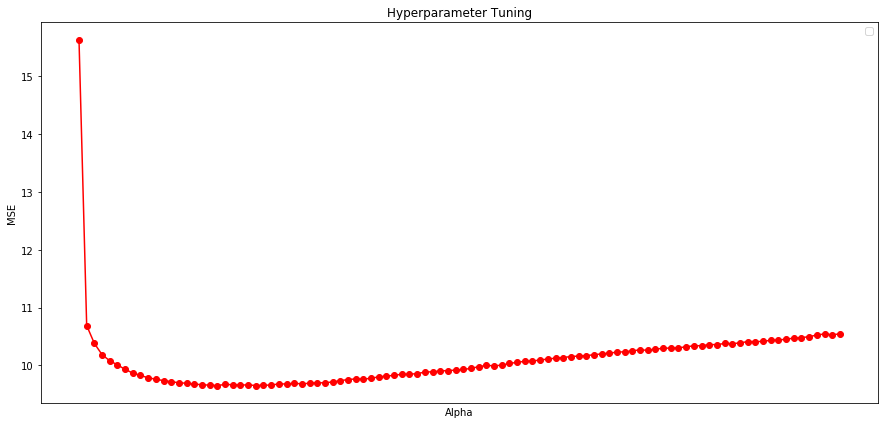

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,7)

fig, ax = plt.subplots(1) 
ax.plot(results_NB['alpha'], results_NB['test_score'],'ro-')
ax.set_title('Hyperparameter Tuning')
ax.set(xlabel='Alpha', ylabel='MSE')
ax.set_xticks(ind)
ax.set_xticklabels(["Min"])
plt.legend(loc="upper right")